# Statistics For Data Science

Statistics, in general, is the method of collection of data, tabulation, and interpretation of numerical data. It is an area of applied mathematics concern with data collection analysis, interpretation, and presentation. With statistics, we can see how data can be used to solve complex problems.

## Understanding the Descriptive Statistics

To understand a distribution completely and properly we need the following measures:

1. Measures of central tendency

2. Measures of dispersion

3. Measures to describe shape of distribution


# 1. Measure of central tendency:

The measure of central tendency is a single value that attempts to describe the whole set of data. There are three main features of central tendency – 

- Mean
- Median
- Mode

## Mean

It is the sum of observations divided by the total number of observations. It is also defined as average which is the sum divided by count. 

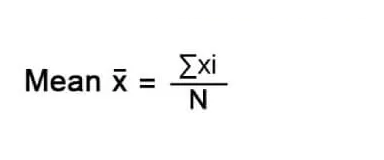


## Median

It is the middle value of the data set. It splits the data into two halves. If the number of elements in the data set is odd then the center element is median and if it is even then the median would be the average of two central elements.

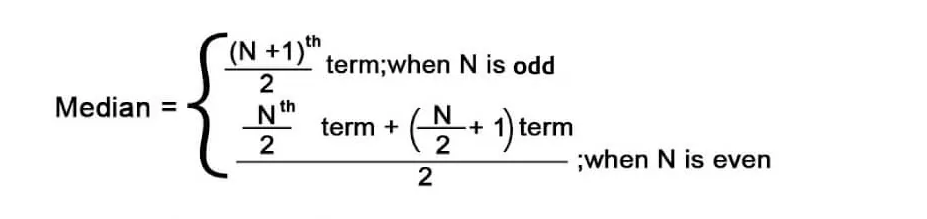

## Mode

It is the value that has the highest frequency in the given data set. The data set may have no mode if the frequency of all data points is the same. Also, we can have more than one mode if we encounter two or more data points having the same frequency. 

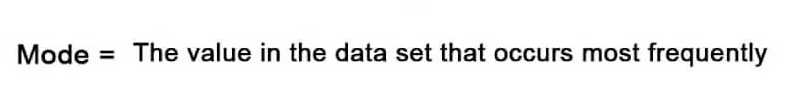

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
path="house-prices.csv"
df = pd.read_csv(path)
df[:5]

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


Mean:  130427.34375 
Median:  125950.0 
Mode:  103200


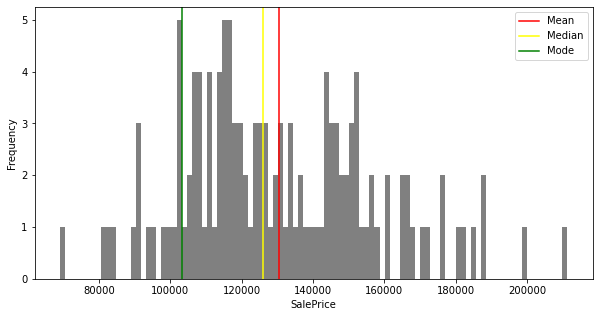

In [41]:
saleprice = df['Price']

mean=saleprice.mean()
median=saleprice.median()
mode=saleprice.mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])
plt.figure(figsize=(10,5))
plt.hist(saleprice,bins=100,color='grey')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 2. Measures of dispersion: 

As the measure of central value gives out the central value of the distribution, measures of dispersion describe the spread of data or the variation of data around the central value. Two different distributions can have the same mean or median but different levels of variability. There are many different measures to measure the dispersion as described below:

**Range:** Provides the difference between the largest and smallest value of the dataset. It’s the simplest method to calculate and see the spread of our data but as it’s the difference between the extreme values it doesn’t tell us how our data is distributed.

**Quartile/ Percentile:** makes it easy to work with data which is not symmetrically distributed and has outliers.

Mean, Median and mode is the numerical summary of the entire dataset which is symmetrically distributed whereas quartiles divide our dataset into four equally sized groups based on five number summary:

Minimum, first quartile, median, third quartile and maximum. The box in the box plot represents the 50 percent of the data values known as interquartile range (IQR). IQR indicates the variability in the set of values. Large IQR means a large spread in values. Small IQR indicates most of the values fall near the center of data. Box plot shows minimum and maximum values through the whiskers which extends both the sides and also outlier points which extends beyond the whiskers.

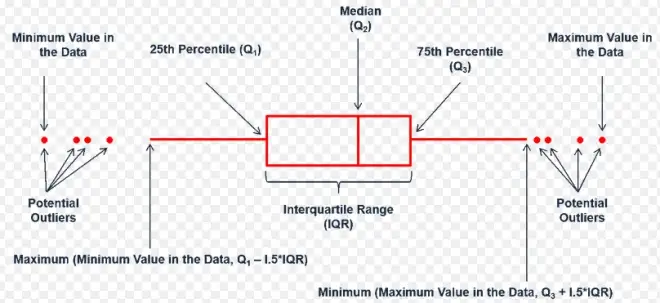

**Interquartile Range (IQR):** It’s the difference between the third quartile and the first quartile. 50% of the population data lies here.

**Variance:** Calculated by taking the deviation of each value in the dataset from the mean and then squaring it. In other words, Variance is the average of all squared deviations.

**Standard Deviation**: SD gives us an idea about the concentration of the data around the mean of the dataset. Standard deviation is low if the data is highly concentrated around the mean and vice versa. It is very sensitive to outliers as outliers impact the mean of the dataset which in turn affects the standard deviation. It is the square root of variance.

In [43]:
#minimum value of salePrice
df['Price'].min() 

69100

In [44]:
#maximum value of salePrice
df['Price'].max()

211200

In [45]:
#Range
df['Price'].max()-df['Price'].min()

142100

In [46]:
#variance
df['Price'].var()

721930821.2352362

In [48]:
#standard deviation
import math 

math.sqrt(df['Price'].var())

26868.770370734055

In [52]:
#50th percentile i.e median(q2)
q1 = df['Price'].quantile(0.5)

In [50]:
#75th percentile
q3 = df['Price'].quantile(0.75)
q3

148250.0

In [53]:
#interquartile range
IQR = q3  - q1
IQR

22300.0

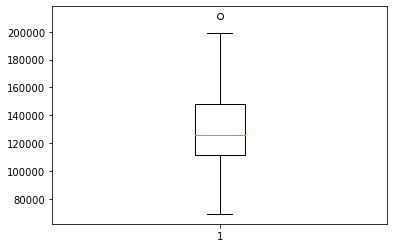

In [54]:
plt.boxplot(df['Price'])
plt.show()

## 3. Measures to describe shape of distribution:

Measures of center and spread tells us just about the central values and spread. How do we describe the shape of the distribution?

Histogram will give us a general idea, but two numerical measures of shape will help us with the precise evaluation of the shape of the distribution.

**Skewness** is the asymmetry in the distribution because of which the curve appears distorted or skewed either to left or right of the normal distribution in a dataset.

In other words skewness is the extent to which a distribution differs from a normal distribution.

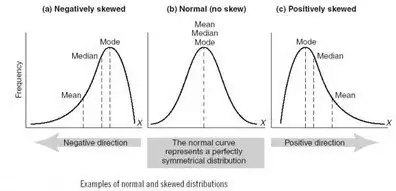

**Skewed distributions can be:**

**Positively skewed:** Most frequent values are low and tail is towards high values.

**Negatively skewed:** Most frequent values are high and tail is towards low values.

Measures of central tendency can also be used to detect skewness in a distribution.

Central tendency values will not be the same if the distribution is skewed.

- If Mode< Median< Mean then the distribution is positively skewed.

- If Mode> Median> Mean then the distribution is negatively skewed.

**Kurtosis** is the measure of the combined weight of the tails of the distribution relative to the center of the distribution. When a normal distribution is represented via histogram, it shows a bell curve with + and — standard deviations from mean. However, when kurtosis is present then the tails further extend farther than the + and — standard deviations of the normal bell-curved distribution. Kurtosis makes the data to look flatter (or less flat as compared to normal distribution). The standard normal distribution has kurtosis of 3.

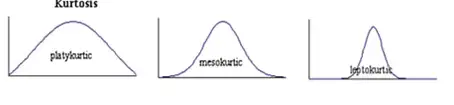

#### Types of Kurtosis

When the distribution of the data is similar to the normal distribution or the kurtosis of the distribution is 3, it is called as Mesokurtic distribution.

Any distribution which has kurtosis more than Normal distribution (K>3), it is called as leptokurtic (thin) distribution. This type distribution has positive kurtosis.

Distribution which has kurtosis less than Normal distribution (K < 3), it is called as platykurtic(flat) distribution. This type distribution has negative kurtosis.

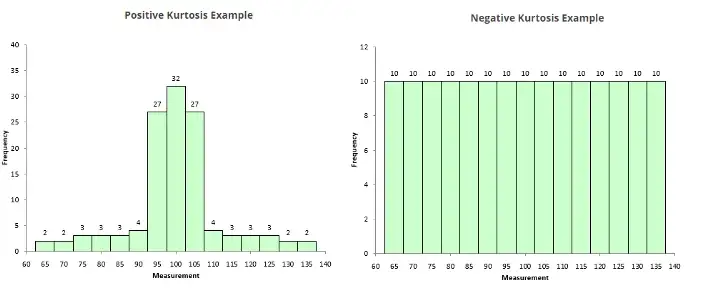

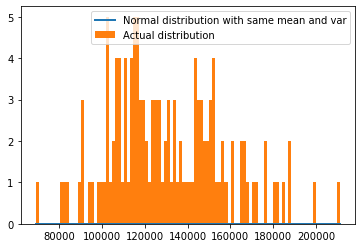

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
path="house-prices.csv"
df = pd.read_csv(path)
#skewness
df['Price'].skew()

#kutosis
df['Price'].kurt()

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(df['Price'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,bins = 100,label="Actual distribution")      
plt.legend()
plt.show() 

# Normal Distribution

Even if you are not in the field of statistics, you must have come across the term “Normal Distribution”.

A probability distribution is a statistical function that describes the likelihood of obtaining the possible values that a random variable can take. By this, we mean the range of values that a parameter can take when we randomly pick up values from it.

A probability distribution can be discrete or continuous.

Suppose in a city we have heights of adults between the age group of 20-30 years ranging from 4.5 ft. to 7 ft.

If we were asked to pick up 1 adult randomly and asked what his/her (assuming gender does not affect height) height would be? There’s no way to know what the height will be. But if we have the distribution of heights of adults in the city, we can bet on the most probable outcome.

## What is Normal Distribution?

A Normal Distribution is also known as a Gaussian distribution or famously Bell Curve. People use both words interchangeably, but it means the same thing. It is a continuous probability distribution.

The probability density function (pdf) for Normal Distribution:

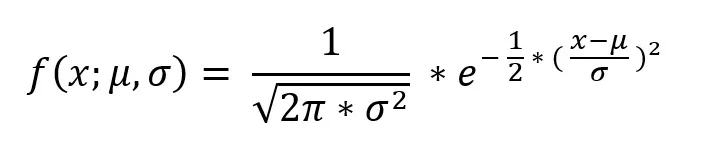

where, μ = Mean , σ = Standard deviation , x = input value.

Terminology:

- Mean – The mean is the usual average. The sum of total points divided by the total number of points.

- Standard Deviation – Standard deviation tells us how “spread out” the data is. It is a measure of how far each observed value is from the mean.

### 1. Example Implementation of Normal Distribution

Text(0, 0.5, 'Probability Density')

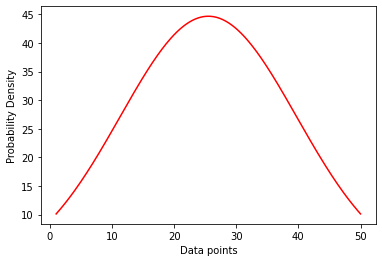

In [62]:
# Importing required libraries
 
import numpy as np
import matplotlib.pyplot as plt
 
# Creating a series of data of in range of 1-50.
x = np.linspace(1,50,200)
 
#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density
 
#Calculate mean and Standard deviation.
mean = np.mean(x)
sd = np.std(x)
 
#Apply function to the data.
pdf = normal_dist(x,mean,sd)
 
#Plotting the Results
plt.plot(x,pdf , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

## 2. Properties of Normal Distribution

**Some excellent properties of a normal distribution:**

- The mean, mode, and median are all equal
- The total area under the curve is equal to 1
- The curve is symmetric around the mean

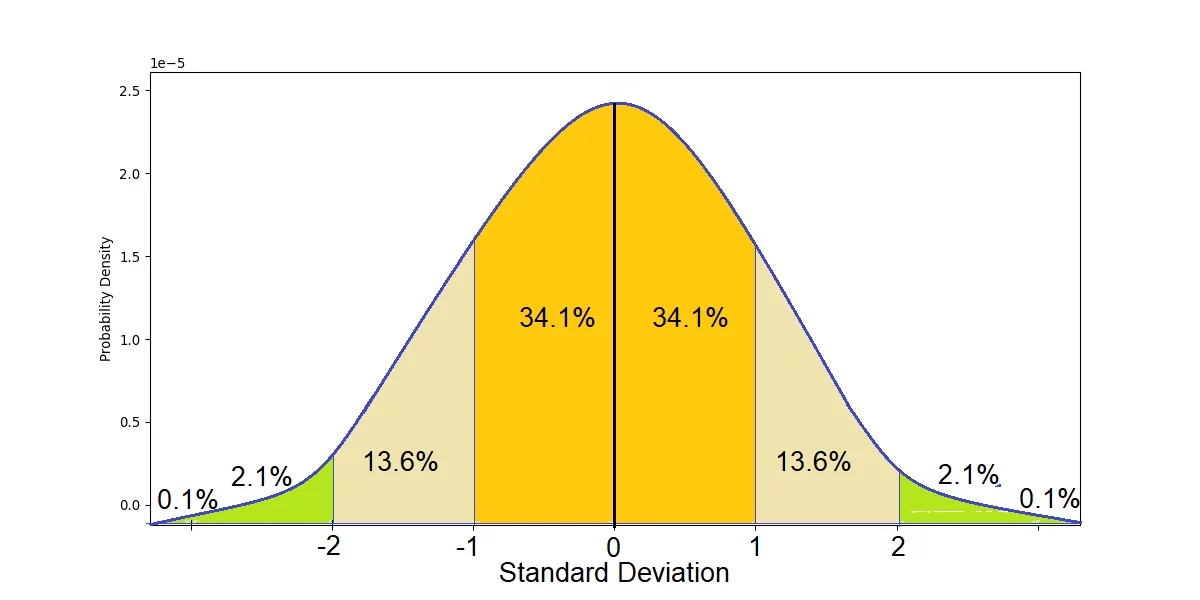

**Empirical rule tells us that:**

- 68% of the data falls within one standard deviation of the mean.
- 95% of the data falls within two standard deviations of the mean.
- 99.7% of the data falls within three standard deviations of the mean.

# Binomial Distribution

Binomial Distribution is a Discrete Distribution.

It describes the outcome of binary scenarios, e.g. toss of a coin, it will either be head or tails.

**It has three parameters:**

- n - number of trials.
- p - probability of occurence of each trial (e.g. for toss of a coin 0.5 each).
- size - The shape of the returned array.

**Discrete Distribution:** The distribution is defined at separate set of events, e.g. a coin toss's result is discrete as it can be only head or tails whereas height of people is continuous as it can be 170, 170.1, 170.11 and so on.

### Example

In [63]:
from numpy import random

x = random.binomial(n=10, p=0.5, size=10)

print(x)

[6 6 1 4 4 6 6 5 4 5]


## Visualization of Binomial Distribution

### Example

C:\Users\Administrator.LAB-STUDENT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


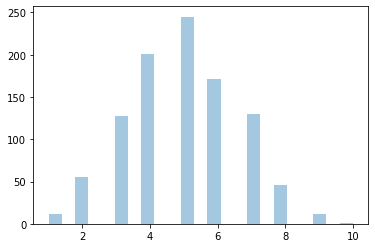

In [64]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.binomial(n=10, p=0.5, size=1000), hist=True, kde=False)

plt.show()

## Difference Between Normal and Binomial Distribution

The main difference is that normal distribution is continous whereas binomial is discrete, but if there are enough data points it will be quite similar to normal distribution with certain loc and scale.

### Example

C:\Users\Administrator.LAB-STUDENT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator.LAB-STUDENT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


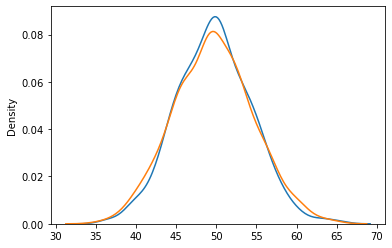

In [65]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.normal(loc=50, scale=5, size=1000), hist=False, label='normal')
sns.distplot(random.binomial(n=100, p=0.5, size=1000), hist=False, label='binomial')

plt.show()

# Z-Score

The z-score is a score that measures how many standard deviations a data point is away from the mean. The z-score allows us to determine how usual or unusual a data point is in a distribution. The z-score allows us more easily compare datapoints for a record across features, especially when the different features have significantly different ranges.

The z-score must be used with a normal distribution, which is one of the prerequisites for calculating a standard deviation. We know that in a normal distribution, over 99% of values fall within 3 standard deviations from the mean. Because of this, we can assume that if a z-score returned is larger than 3 that the value is quite unusual.

The benefit of this standardization is that it doesn’t rely on the original values of the feature in the dataset. Because of this, we’re able to more easily compare the impact of one feature to another.

The z-score is generally calculated for each value in a given feature. It takes into account the standard deviation and the mean of the feature. 

The formula for the z-score looks like this:

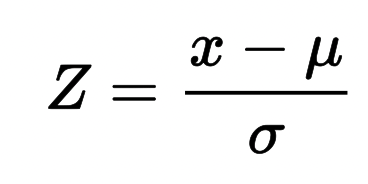

where:

- X is a single raw data value
- μ is the population mean
- σ is the population standard deviation

For each value in an array, the z-score is calculated by dividing the difference between the value and the mean by the standard deviation of the distribution. Because of this, the z-score can be either positive or negative, indicating whether the value is larger or smaller than the mean.

# How to Use Scipy to Calculate a Z-Score

We can calculate z-scores in Python using scipy.stats.zscore, which uses the following syntax:

    scipy.stats.zscore(a, axis=0, ddof=0, nan_policy=’propagate’)

In [3]:
# Calculate the z-score from with scipy
import scipy.stats as stats
values = [4,5,6,6,6,7,8,12,13,13,14,18]

zscores = stats.zscore(values)
print(zscores)

[-1.2493901  -1.01512945 -0.78086881 -0.78086881 -0.78086881 -0.54660817
 -0.31234752  0.62469505  0.85895569  0.85895569  1.09321633  2.0302589 ]


## How to Use Pandas to Calculate a Z-Score

In [4]:
# Loading a Sample Pandas Dataframe
import pandas as pd

df = pd.DataFrame.from_dict({
    'Name': ['Nik', 'Kate', 'Joe', 'Mitch', 'Alana'],
    'Age': [32, 30, 67, 34, 20],
    'Income': [80000, 90000, 45000, 23000, 12000],
    'Education' : [5, 7, 3, 4, 4]
})

print(df.head())

    Name  Age  Income  Education
0    Nik   32   80000          5
1   Kate   30   90000          7
2    Joe   67   45000          3
3  Mitch   34   23000          4
4  Alana   20   12000          4


In [5]:
df['Income zscore'] = stats.zscore(df['Income'])
print(df.head())

    Name  Age  Income  Education  Income zscore
0    Nik   32   80000          5       0.978700
1   Kate   30   90000          7       1.304934
2    Joe   67   45000          3      -0.163117
3  Mitch   34   23000          4      -0.880830
4  Alana   20   12000          4      -1.239687


**One of the benefits of calculating z-scores is to actually normalize values across features. Because of this, it’s often useful to calculate the z-scores for all numerical columns in a dataframe.**

Let’s see how we can convert our dataframe columns to z-scores using the Pandas .apply() method:

In [6]:
df = df.select_dtypes(include='number').apply(stats.zscore)
print(df.head())

        Age    Income  Education  Income zscore
0 -0.288493  0.978700   0.294884       0.978700
1 -0.413925  1.304934   1.769303       1.304934
2  1.906565 -0.163117  -1.179536      -0.163117
3 -0.163061 -0.880830  -0.442326      -0.880830
4 -1.041085 -1.239687  -0.442326      -1.239687


## Calculate a z-score From a Mean and Standard Deviation in Python

In [7]:
# Calculate a z-score from a provided mean and standard deviation
import statistics
mean = 7
standard_deviation = 1.3

zscore = statistics.NormalDist(mean, standard_deviation).zscore(5)
print(zscore)

-1.5384615384615383


**We can see that this returns a value of -1.538, meaning that the value is roughly 1.5 standard deviations away from the mean.**

# Z-Tests in Python

    syntax: statsmodels.stats.weightstats.ztest(x1, x2=None, value=0)

Here:

- x1: values for the first sample
- x2: values for the second sample (if performing a two sample z-test)
- value: mean under the null (in one sample case) or mean difference (in two sample case)

### Example 1: One Sample Z-Test in Python

Suppose the IQ in a certain population is normally distributed with a mean of μ = 100 and standard deviation of σ = 15.

A researcher wants to know if a new drug affects IQ levels, so he recruits 20 patients to try it and records their IQ levels.

The following code shows how to perform a one sample z-test in Python to determine if the new drug causes a significant difference in IQ levels:

In [14]:
from statsmodels.stats.weightstats import ztest as ztest

#enter IQ levels for 20 patients
data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99,
        105, 109, 109, 109, 110, 112, 112, 113, 114, 115]

#perform one sample z-test
ztest(data, value=100)

(1.5976240527147705, 0.1101266701438426)

The test statistic for the one sample z-test is 1.5976 and the corresponding p-value is 0.1101.

Since this p-value is not less than .05, we do not have sufficient evidence to reject the null hypothesis. In other words, the new drug does not significantly affect IQ level.

### Example 2: Two Sample Z-Test in Python

Suppose the IQ levels among individuals in two different cities are known to be normally distributed with known standard deviations.

A researcher wants to know if the mean IQ level between individuals in city A and city B are different, so she selects a simple random sample of  20 individuals from each city and records their IQ levels.

The following code shows how to perform a two sample z-test in Python to determine if the mean IQ level is different between the two cities:

In [15]:
from statsmodels.stats.weightstats import ztest as ztest

#enter IQ levels for 20 individuals from each city
cityA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99,
         105, 109, 109, 109, 110, 112, 112, 113, 114, 114]

cityB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109,
         109, 114, 115, 116, 117, 117, 128, 129, 130, 133]

#perform two sample z-test
ztest(cityA, cityB, value=0) 

(-1.9953236073282115, 0.046007596761332065)

The test statistic for the two sample z-test is -1.9953 and the corresponding p-value is 0.0460.

Since this p-value is less than .05, we have sufficient evidence to reject the null hypothesis. In other words, the mean IQ level is significantly different between the two cities.

# t-test in Python

- Student’s t-test or t-test is a parametric inferential statistical method used for comparing the means between two different groups (two-sample t-test) or with the specific value (one-sample t-test).
- In t-test, test statistic follows the t-distribution (type of continuous probability distribution) under the null hypothesis.
- t-distribution is first proposed by William Sealy Gosset and published under the fictitious name of “Student” in Biometrika scientific journal. Hence, t-distribution is also known as Student’s t-distribution.
- In contrast to the Z-test, which requires a larger sample size (t and z distributions are similar for larger sample size, say n ≥ 30), the t-test is specially developed for the small sample size data (n ≤ 30). t-test is also applies for extremely small sample size data (n ≤ 5). t-test provides more conservative results for small sample datasets.
- t-test has three main types: One Sample t-test, two sample t-test (unpaired or independent), and paired t-test.
- In one sample t-test, the sample mean is compared with the hypothesized values, whereas in two sample t-test ( independent or unpaired t test), means of two independent groups are compared. In paired t-test, differences between the pair of dependent variables are compared.

### Types of t-testPermalink

### - One Sample t-test

One Sample t-test (single sample t-test) is used for comparing the sample mean (a random sample from a population) with the specific value (hypothesized or known mean of the population). In t-test, the population variance (σ2) is unknown and it is estimated from the sample variance (s).

For example, a ball has a diameter of 5 cm and we want to check whether the average diameter of the ball from the random sample (e.g. 50 balls) picked from the production line differs from the known size.

### Assumptions

- Dependent variable should have an approximately normal distribution (Shapiro-Wilks Test)
- Observations are independent of each other
- Dependent variable should be continuous
- Population variance (σ2) is unknown

**Note: One sample t-test is relatively robust to the assumption of normality when the sample size is large (n ≥ 30)**

### Hypotheses

**Null hypothesis:** Sample mean is equal to the hypothesized or known population mean

**Alternative hypothesis:** Sample mean is not equal to the hypothesized or known population mean (two-tailed or two-sided)
**Alternative hypothesis:** Sample mean is either greater or lesser to the hypothesized or known population mean (one-tailed or one-sided)

### Formula

- One Sample t-test formula

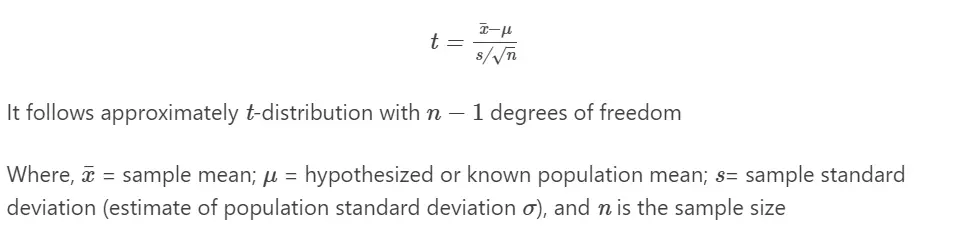

### Calculate one sample t-test in Python

Suppose a botanist wants to know if the mean height of a certain species of plant is equal to 15 inches. She collects a random sample of 12 plants and records each of their heights in inches.

Use the following steps to conduct a one sample t-test to determine if the mean height for this species of plant is actually equal to 15 inches.

In [16]:
data = [14, 14, 16, 13, 12, 17, 15, 14, 15, 13, 15, 14]

import scipy.stats as stats

#perform one sample t-test
stats.ttest_1samp(a=data, popmean=15)

Ttest_1sampResult(statistic=-1.6848470783484626, pvalue=0.12014460742498101)

In [67]:
# Python program to display variance of data groups

# Import library
import scipy.stats as stats
import numpy as np

# Creating data groups
data_group1 = np.array([14, 15, 15, 16, 13, 8, 14,
17, 16, 14, 19, 20, 21, 15,
15, 16, 16, 13, 14, 12])
data_group2 = np.array([15, 17, 14, 17, 14, 8, 12,
19, 19, 14, 17, 22, 24, 16,
13, 16, 13, 18, 15, 13])

# Print the variance of both data groups
print(np.var(data_group1), np.var(data_group2))


7.727500000000001 12.260000000000002


The two hypotheses for this particular one sample t-test are as follows:

    H0: µ = 15 (the mean height for this species of plant is 15 inches)

    HA: µ ≠15 (the mean height is not 15 inches)

Because the p-value of our test (0.1201) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean height for this particular species of plant is different from 15 inches.

### - Two sample t-test (unpaired or independent t-test)

The two-sample (unpaired or independent) t-test compares the means of two independent groups, determining whether they are equal or significantly different. In two sample t-test, usually, we compute the sample means from two groups and derives the conclusion for the population’s means (unknown means) from which two groups are drawn.

For example, we have two different plant genotypes (genotype A and genotype B) and would like to compare if the yield of genotype A is significantly different from genotype B

Hypotheses

**Null hypothesis:** Two group means are equal
**Alternative hypothesis:** Two group means are different (two-tailed or two-sided)
**Alternative hypothesis:** Mean of one group either greater or lesser than another group (one-tailed or one-sided)

### Assumptions

- Observations in two groups have an approximately normal distribution (Shapiro-Wilks Test)
- Homogeneity of variances (variances are equal between treatment groups) (Levene or Bartlett Test)
- The two groups are sampled independently from each other from the same population
- Dependent variable should be continuous
- Population variances (σ1 and σ2) are unknown

***Note: Two sample t-test is relatively robust to the assumption of normality and homogeneity of variances when sample size is large (n ≥ 30) and there are equal number of samples (n1 = n2) in both groups.***

### Formula

Two sample (independent) t-test formula,

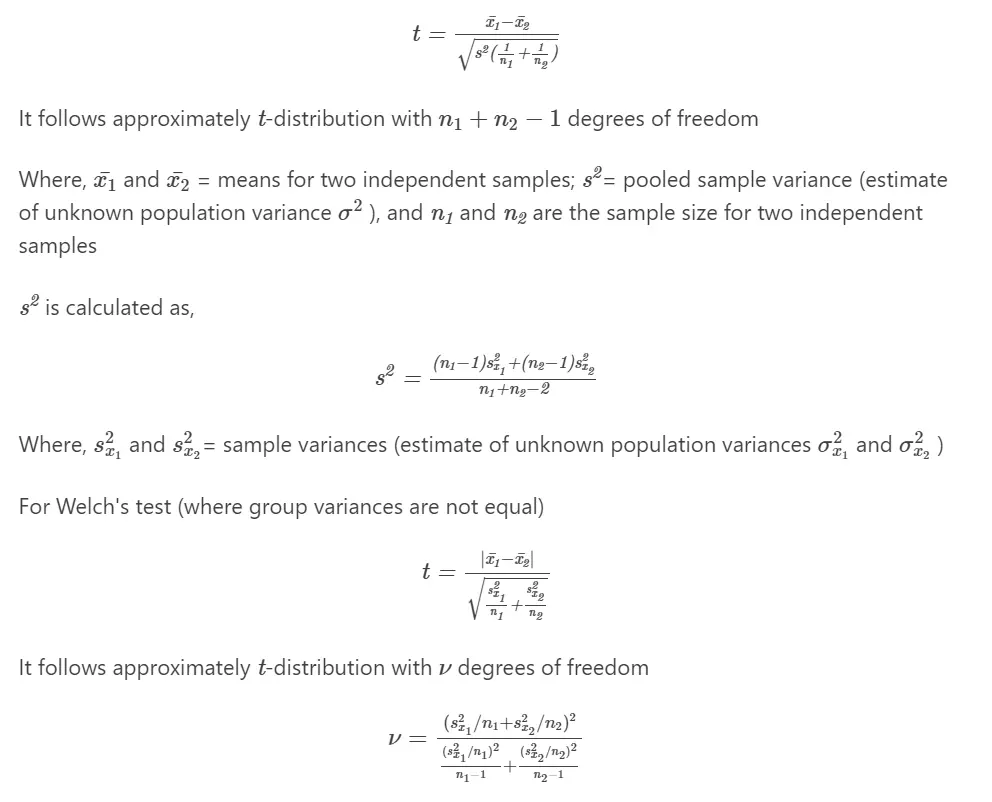

### Calculate two sample t-test in Python

Researchers want to know whether or not two different species of plants have the same mean height. To test this, they collect a simple random sample of 20 plants from each species.

In [18]:
import numpy as np

group1 = np.array([14, 15, 15, 16, 13, 8, 14, 17, 16, 14, 19, 20, 21, 15, 15, 16, 16, 13, 14, 12])
group2 = np.array([15, 17, 14, 17, 14, 8, 12, 19, 19, 14, 17, 22, 24, 16, 13, 16, 13, 18, 15, 13])

#find variance for each group
print(np.var(group1), np.var(group2))

7.727500000000001 12.260000000000002


**The ratio of the larger sample variance to the smaller sample variance is 12.26 / 7.73 = 1.586, which is less than 4. This means we can assume that the population variances are equal.**

In [19]:
import scipy.stats as stats

#perform two sample t-test with equal variances
stats.ttest_ind(a=group1, b=group2, equal_var=True)

Ttest_indResult(statistic=-0.6337397070250238, pvalue=0.5300471010405257)

The two hypotheses for this particular two sample t-test are as follows:

    H0: µ1 = µ2 (the two population means are equal)

    HA: µ1 ≠µ2 (the two population means are not equal)

Because the p-value of our test (0.53005) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean height of plants between the two populations is different.

## Analyzing the result:

Two sample t-test has the following hypothesis:

    H0 => µ1 = µ2 (population mean of dataset1 is equal to dataset2)

    HA => µ1 ≠µ2 (population mean of dataset1 is different from dataset2)

Here, since the p-value (0.53004) is greater than alpha = 0.05 so we cannot reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean height of students between the two data groups is different.

### Method 2: Two-Sample T-Test with Statsmodels

    Syntax: ttest_ind(data_group1, data_group2)

Here,

- data_group1: First data group
- data_group2: Second data group

In [66]:
# Python program to conduct
# two-sample t-test using statsmodels

# Importing library
from statsmodels.stats.weightstats import ttest_ind
import numpy as np

# Creating data groups

data_group1 = np.array([160, 150, 160, 156.12,
163.24,
160.56, 168.56, 174.12,
167.123, 165.12])

data_group2 = np.array([157.97, 146, 140.2, 170.15,
167.34, 176.123, 162.35,
159.123, 169.43, 148.123])

# Conducting two-sample ttest
ttest_ind(data_group1, data_group2)

(0.6531479162158739, 0.5219170107019715, 18.0)

This is the time to analyze the result. The p-value of the test comes out to be equal to 0.521, which is greater than the significance level alpha (that is, 0.05). This implies that we can say that the average height of students in one class is statistically not different from the average height of students in another class. 



# Chi-Square Test

### What is Chi-square?

The Chi-square test is a statistical test used to determine the relationship between the categorical variables/columns in the dataset. It examines the correlation between the variables which do not contain the continuous data.

### How to use the Chi-square test?

To use the chi-square test, we can take the following steps:

1. Define the null (H0) and alternative (H1) hypothesis.
2. Determine the value of alpha (𝞪) for according to the domain you are working. Ideally 𝞪=0.05 that means you are willing to take 0.5% of risk/ margin of error.
3. Check the data for Nans or other kind of errors.
4. Check the assumptions for the test.
5. At last perform the test and draw your conclusion  whether to reject or support null hypothesis (H0) .   

The formula for the Chi-square test is given as:

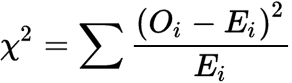

The Chi-square formula is a statistical method to compare two or more data samples. It is used with data that consist of variables distributed across various categories and is denoted by .

### Where is the Chi-square test used?

Pearson’s chi-squared test is a hypothesis test that is used to determine whether there is a significant association between two categorical variables in the data. The test involves two hypotheses (H0 & H1):

    H0 : The two categorical variables have no relationship (independent)
    H1 : There is a relationship (dependent) between two categorical variables

So as a null hypothesis, we keep the positive aspect of the test and in the alternate hypothesis, we keep the negative aspect. The positive aspect of chi-square is that there should not be any correlation because correlation can result in overfitting of the machine learning algorithm. The negative is that there is a correlation between the two categorical columns.

In [35]:
data = [[120, 90, 40],
        [110, 95, 45]]

import scipy.stats as stats

#perform the Chi-Square Test of Independence
stats.chi2_contingency(data)

(0.8640353908896108,
 0.6491978887380976,
 2,
 array([[115. ,  92.5,  42.5],
        [115. ,  92.5,  42.5]]))

### The way to interpret the output is as follows:

- Chi-Square Test Statistic: 0.864
- p-value: 0.649
- Degrees of freedom: 2 (calculated as #rows-1 * #columns-1)
- Array: The last array displays the expected values for each cell in the contingency table.

Recall that the Chi-Square Test of Independence uses the following null and alternative hypotheses:

    H0: (null hypothesis) The two variables are independent.
    H1: (alternative hypothesis) The two variables are not independent.

Since the p-value (.649) of the test is not less than 0.05, we fail to reject the null hypothesis. This means we do not have sufficient evidence to say that there is an association between gender and political party preference.

### In other words, gender and political party preference are independent.

# F-Test

An F-test is used to test whether two population variances are equal. The null and alternative hypotheses for the test are as follows:

    H0: σ12 = σ22 (the population variances are equal)

    H1: σ12 ≠ σ22 (the population variances are not equal)

### Example: F-Test in Python

In [32]:
x = [18, 19, 22, 25, 27, 28, 41, 45, 51, 55]
y = [14, 15, 15, 17, 18, 22, 25, 25, 27, 34]

We can use the following function to perform an F-test to determine if the two populations these samples came from have equal variances:

In [34]:
import numpy as np
import scipy

#define F-test function
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

#perform F-test
f_test(x, y)

(4.387122002085505, 0.01912653593238578)

**The F test statistic is 4.38712 and the corresponding p-value is 0.019127. Since this p-value is less than .05, we would reject the null hypothesis. This means we have sufficient evidence to say that the two population variances are not equal.**

### Notes

- The F test statistic is calculated as s12 / s22. By default, numpy.var calculates the population variance. To calculate the sample variance, we need to specify ddof=1.
- The p-value corresponds to 1 – cdf of the F distribution with numerator degrees of freedom = n1-1 and denominator degrees of freedom = n2-1.
- This function only works when the first sample variance is larger than the second sample variance. Thus, define the two samples in such a way that they work with the function.

### When to Use the F-Test

**The F-test is typically used to answer one of the following questions:**

1. Do two samples come from populations with equal variances?
2. Does a new treatment or process reduce the variability of some current treatment or process?

# ANOVA

## What is ANOVA?

Whenever we have a dataset with multiple dependent and one independent variable, we can do an ANOVA Test. ANOVA stands for Analysis of Variance. It uses F test which was named in honor of Sir Ronald Fisher.

## Why ANOVA?

ANOVA helps us to know if the differences between groups are statistically significant. When we get a clear idea about how the variables mean is different from others, we being to understand which of the factors has a connection with the dependent variable and we begin to understand what’s driving the behavior. Questions like which feature(s) has the most impact on the outcome can be determined by ANOVA.

## What is F Test?

F-value is the ratio of two variances, more precisely two mean squares. Mean squares are variances accounting degrees of freedom which are used in estimating the variance. It is given by the formula

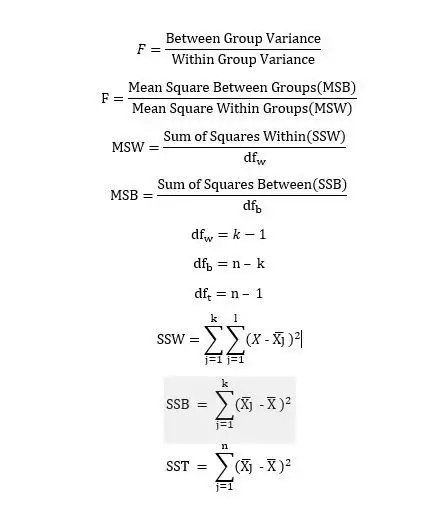

F values are a unitless statistic so interpreting them is hard. However, in a scenario where null hypothesis is true, the F value produces 1. But in other cases, the F value would be larger than 1. But being a unitless statistic its very hard to interpret it, so we use the p value to determine the significance of F-test. A low p value, lower than our significance level indicates that we can reject the null hypothesis.

## All about Variability

Variance is all about how far our data points are from the mean. Larger the difference in means, the more variance we would observe. ANOVA and F-test assess this variability between the means between and within the groups to determine whether if these differences are statistically significant.

## Assumptions for ANOVA

- IID — Independently and Identically distributed.

- Homoscedasticity and Homogeneity of Variances.

- Normal Distribution of Population.

- Independence of Samples.

- Equal Sample Sizes of Groups.

- The dependent variable is also continuous.

## Hypothesis in ANOVA

- Null Hypothesis: Means are equal (µ0 = µ1 = … = µn)

- Alternate Hypothesis: Means are not Equal ( µ0 ≠ µ1 ≠ … ≠ µn )

## Types of ANOVA

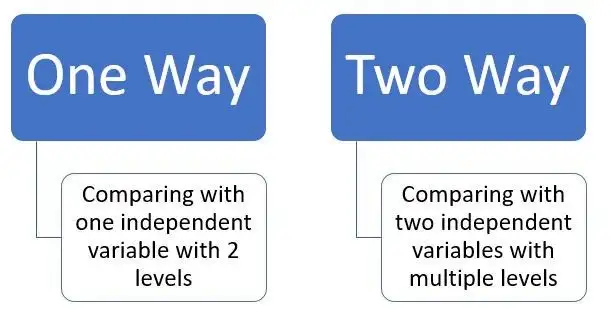

## When to go for One Way ANOVA ?

1. In case of One Way ANOVA , there is one independent variable affecting a dependent variable.

2. When we want to test two groups and see if there is any difference between them.

E.g. Studying effect of a herbal concoction on weight loss. So the groups maybe people who drink normal tea, the herbal concoction or nothing.

## Limitation

One Way ANOVA would tell you that at least two groups were different from each other but won’t tell you which groups were different. We may need to run additional tests in order to find that out.

## Example: One-Way ANOVA in Python

A researcher recruits 30 students to participate in a study. The students are randomly assigned to use one of three studying techniques for the next three weeks to prepare for an exam. At the end of the three weeks, all of the students take the same test. 

In [58]:
#enter exam scores for each group
group1 = [85, 86, 88, 75, 78, 94, 98, 79, 71, 80]
group2 = [91, 92, 93, 85, 87, 84, 82, 88, 95, 96]
group3 = [79, 78, 88, 94, 92, 85, 83, 85, 82, 81]


from scipy.stats import f_oneway

#perform one-way ANOVA
f_oneway(group1, group2, group3)

F_onewayResult(statistic=2.3575322551335636, pvalue=0.11384795345837218)

## Interpret the results:

A one-way ANOVA uses the following null and alternative hypotheses:

    H0 (null hypothesis): 
    μ1 = μ2 = μ3 = … = μk (all the population means are equal)

    H1 (null hypothesis): 
    at least one population mean is different from the rest

The F test statistic is 2.3575 and the corresponding p-value is 0.1138. Since the p-value is not less than .05, we fail to reject the null hypothesis.

**This means we do not have sufficient evidence to say that there is a difference in exam scores among the three studying techniques.**

## When to go for Two Way ANOVA ?

It is an extension of One Way ANOVA

In case of two way ANOVA we have two independents. Also to note we have one quantitative variable and two nominal/categorical variable.

So we can say that when we have a quantitative outcome along with two categorical variables we go for two way ANOVA.

### Example: Two-Way ANOVA in Python

A botanist wants to know whether or not plant growth is influenced by sunlight exposure and watering frequency. She plants 30 seeds and lets them grow for two months under different conditions for sunlight exposure and watering frequency. After two months, she records the height of each plant, in inches.

In [59]:
import numpy as np
import pandas as pd

#create data
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})

#view first ten rows of data 
df[:10]

,water,sun,height
0,daily,low,6
1,daily,low,6
2,daily,low,6
3,daily,low,5
4,daily,low,6
5,daily,med,5
6,daily,med,5
7,daily,med,6
8,daily,med,4
9,daily,med,5


In [60]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('height ~ C(water) + C(sun) + C(water):C(sun)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(water),8.533333,1.0,16.0000,0.000527
C(sun),24.866667,2.0,23.3125,0.000002
C(water):C(sun),2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


## Interpret the results:

We can see the following p-values for each of the factors in the table:

- water: p-value = .000527
- sun: p-value = .0000002
- water*sun: p-value = .120667

Since the p-values for water and sun are both less than .05, this means that both factors have a statistically significant effect on plant height.

And since the p-value for the interaction effect (.120667) is not less than .05, this tells us that there is no significant interaction effect between sunlight exposure and watering frequency.

# Central Limit Theorem

## The definition: 

The sample mean will approximately be normally distributed for large sample sizes, regardless of the distribution from which we are sampling. 

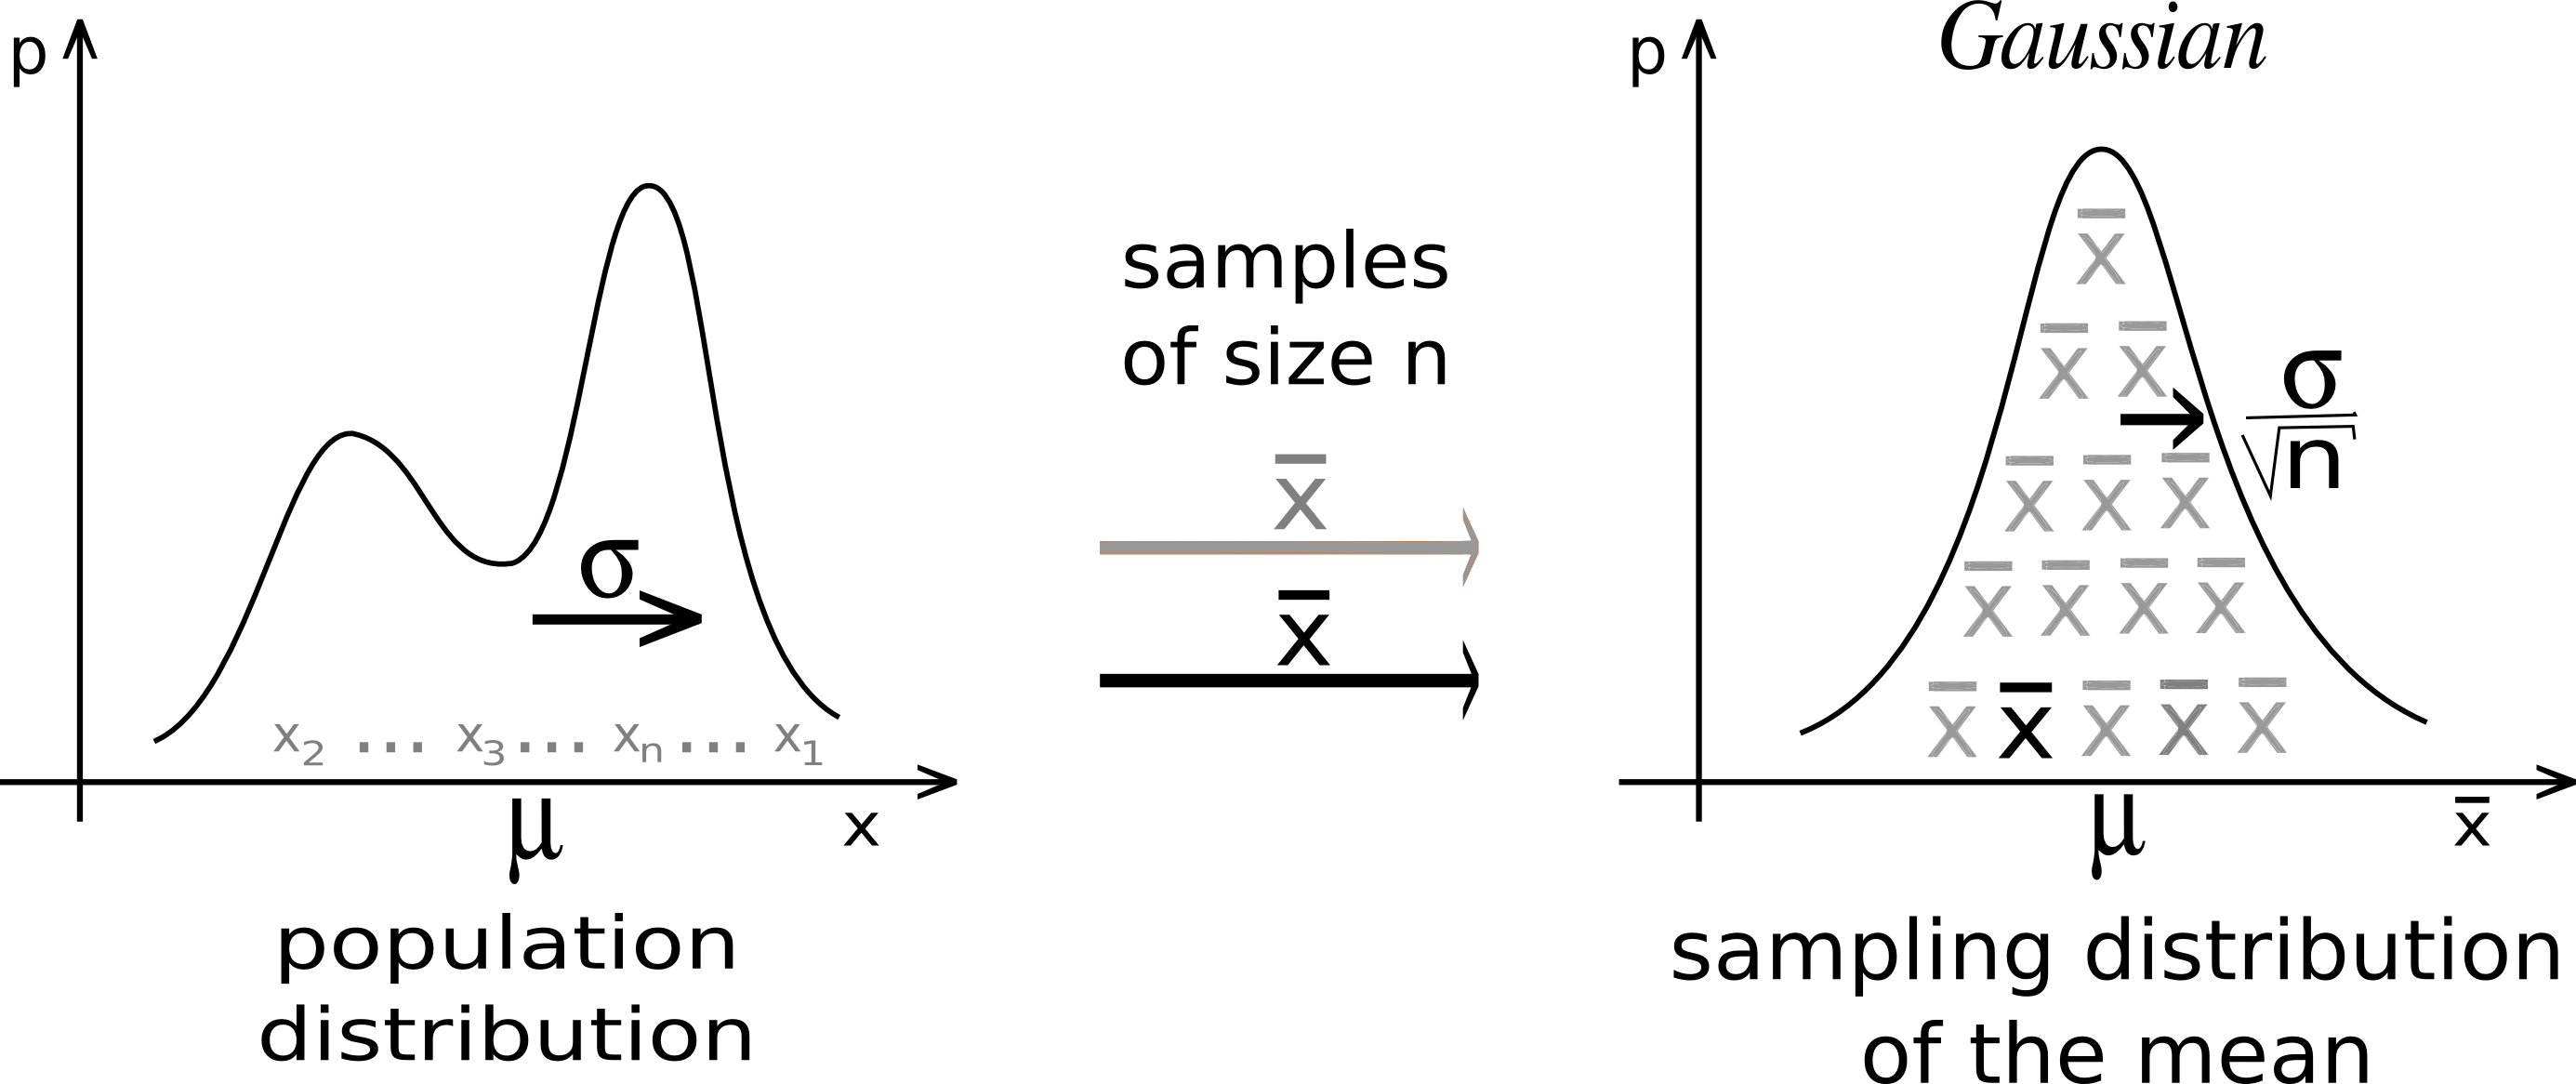

Suppose we are sampling from a population with a finite mean and a finite standard-deviation(sigma). Then Mean and standard deviation of the sampling distribution of the sample mean can be given as: 



Where bar{X}  represents the sampling distribution of the sample mean of size n each, mu  and sigma  are the mean and standard deviation of the population respectively. 

The distribution of the sample tends towards the normal distribution as the sample size increases.

## Python implementation of the Central Limit Theorem 

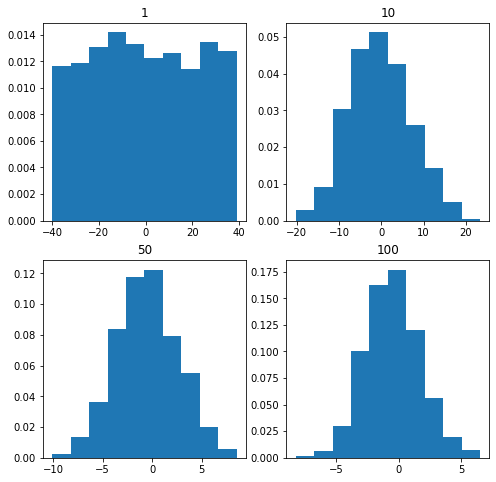

In [68]:
import numpy
import matplotlib.pyplot as plt

# number of sample
num = [1, 10, 50, 100]
# list of sample means
means = []

# Generating 1, 10, 30, 100 random numbers from -40 to 40
# taking their mean and appending it to list means.
for j in num:
    # Generating seed so that we can get same result
    # every time the loop is run...
    numpy.random.seed(1)
    x = [numpy.mean(
        numpy.random.randint(
            -40, 40, j)) for _i in range(1000)]
    means.append(x)
k = 0

# plotting all the means in one figure
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
    for j in range(0, 2):
        # Histogram for each x stored in means
        ax[i, j].hist(means[k], 10, density = True)
        ax[i, j].set_title(label = num[k])
        k = k + 1
plt.show()


# Difference between Type I & Type II Errors

Researcher/scientist assumes to prove or disprove their finding. These assumptions are also known as hypotheses. 

There are mainly two types of hypotheses Null and Alternative Hypothesis. Null and Alternative hypotheses are mutually exclusive statements. 

- A null hypothesis statement is that there is no relation between the two variables. 

- In contrast, an alternative hypothesis is a statement that refers to the statistical relationship between the two variables. 

While doing hypothesis testing, we encounter two types of errors, i.e., 

- type-1 error
- type-2 error

Type-1 and Type -2 errors are interconnected; reducing one can increase the probability of another. 

- Type-1 error is a false-positive finding in hypothesis testing
- type-2 error is a false-negative finding in hypothesis testing

## Difference between Type-1 and Type-2 Error

### Type -1 Error (Error of the first kind)

- It is also known as a false-positive.
- It occurs if the researcher rejects a correct null hypothesis in the population. 
    - i.e., incorrect rejection of the null hypothesis.
- Measured by alpha (significance level).
- If the significance level is fixed at 5%, 
    - It means there are about five chances of type – 1 error out of 100

#### Cause of Type – 1 Error

- The significance level is decided before testing the hypothesis
- Sample size is not considered
- This may occur due to chance
- It can be reduced by decreasing the level of significance.

### Type -2 Error (Error of the second kind)

- It is also known as a false negative.
- It occurs if a researcher fails to reject a null hypothesis that is actually a false hypothesis.
- Measured by beta (the power of test).
- The probability of committing a type -2 error is calculated by 1 – beta (the power of test).

#### Cause of Type – 2 Error:

- A statistical test is not powerful enough.
- It is caused by a smaller sample size.
    - It may hide the significance level of the items being tested.
- It can be reduced by increasing the level of significance.

### Graphical representation of type – 1 and type – 2 Errors:

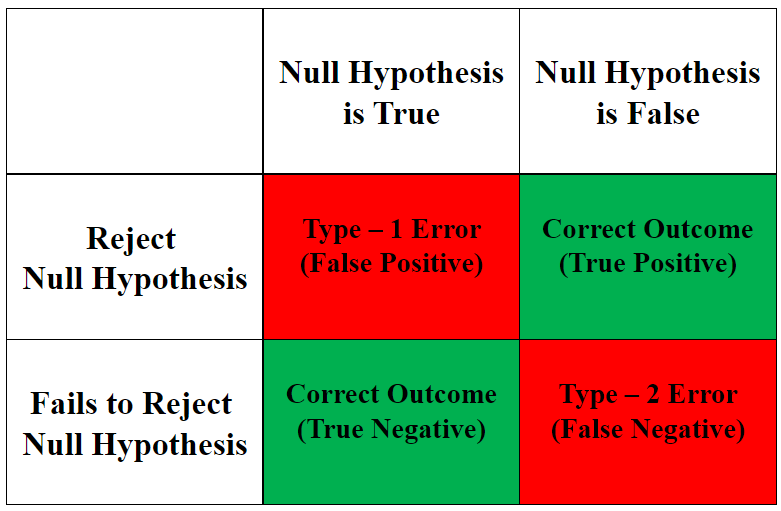

### Examples of Type -1 and Type – 2 Errors

#### Example: 1.  A man goes to test the coronavirus (COVID -19). So, the possible errors are

Type -1 Error (False Positive): Test results are positive, but you don’t.

Type – 2 Error (False Negative): Test results are negative, but you do.

#### Example : 2. A man goes to trial and is being tried for murder.

**Null Hypothesis**: Man is innocent until proven guilty.

**Alternative Hypothesis**: Man is guilty.

**Type -1 Error (False Positive)**: Found guilty, but you are innocent.

**True Positive**: Found guilty and being guilty.

**True Negative**: Found Innocent and being innocent

**Type -2 Error(False Negative)**: Found innocent, but you are guilty.

### Key differences between Type -1 and Type -2 Error

- When the null hypothesis is correct, and the researcher rejects the null hypothesis, this type of error is known as a type -1 error, whereas when the null hypothesis is false. If the researcher fails to reject it, then this type of error is known as a type – 2 error. 
- Type -1 error is also known as false-positive, whereas type – 2 error is known as false-negative.
- By decreasing or increasing the significance level, we can reduce the type – 1 or type – 2 errors.
- Type – 1 and type – 2 errors are inversely related, i.e., if one increases, the other decreases.
- Type – 1 error is measured by alpha (the significance level), whereas type – 2 error is measured by 1 – beta (the power of test).

In [1]:
import pandas as pd

df = pd.read_csv("house-prices.csv")
df[:10]

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
5,6,114600,1780,3,2,2,No,North
6,7,151600,1830,3,3,3,Yes,West
7,8,150700,2160,4,2,2,No,West
8,9,119200,2110,4,2,3,No,East
9,10,104000,1730,3,3,3,No,East


In [3]:
# Mean
print("Avergae price",df['Price'].mean())

# Median
print("Median price",df['Price'].median())

# Mode
print("Mode of price",df['Price'].mode())

Avergae price 130427.34375
Median price 125950.0
Mode of price 0    103200
1    105600
2    117800
3    125700
4    129800
Name: Price, dtype: int64


In [4]:
df.corr()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
Home,1.000000,0.108190,0.168553,-0.068568,0.127694,-0.053597
Price,0.108190,1.000000,0.552982,0.525926,0.523258,-0.313636
SqFt,0.168553,0.552982,1.000000,0.483807,0.522745,0.336923
Bedrooms,-0.068568,0.525926,0.483807,1.000000,0.414556,0.114271
Bathrooms,0.127694,0.523258,0.522745,0.414556,1.000000,0.143793
Offers,-0.053597,-0.313636,0.336923,0.114271,0.143793,1.000000
